# **Implementação - Agente de Compra de Produtos com Análise de Tendência de Preço**

**Objetivo:**

Ampliar a capacidade do agente de tomar decisões mais informadas baseadas não apenas no preço atual e no estoque, mas também na análise da tendência de preços ao longo do tempo.

# **Importar as bibliotecas necessárias para executar o código**

In [ ]:
from random import randint, random
import matplotlib.pyplot as plt
import numpy as np

# **Definição do ambiente**

In [ ]:
# Definição da classe Ambiente
class Ambiente():

  def __init__(self):
    self.num_dias = 0
    self.estoque = 30
    self.historico_preco = [1.5]
    self.historico_estoque = [self.estoque]
    self.historico_qtde_comprados = [0]

  def percebe_preco_atual(self):
    return self.historico_preco[-1]

  def percebe_estoque(self):
    return self.historico_estoque[-1]

  # Simula o funcionamento do ambiente por um dia
  def run(self, dic_acoes):
    # Gera um número aleatório de itens consumidos entre 0 e 10
    qtde_consumidos = randint(0, 10)
    # Calcula o estoque atual considerando os itens consumidos e os comprados
    estoque_atual = self.historico_estoque[-1] - qtde_consumidos + dic_acoes["comprar"]
    self.historico_estoque.append(estoque_atual)
    self.historico_qtde_comprados.append(dic_acoes["comprar"])

    # Gera um valor aleatório para o preço
    valor = 1 + 2 * random()
    self.historico_preco.append(valor)

# **Definição do agente**

In [ ]:
# Definição da classe Agente
class Agente():

  def __init__(self, ambiente):
    self.num_dias = 1
    self.ambiente = ambiente
    self.estoque = ambiente.percebe_estoque()
    self.total_gasto = 0
    self.preco_atual = self.media = ambiente.percebe_preco_atual()

  # Executa a estratégia do agente por um número de dias especificado
  def executa_agente(self, qtde_dias=20):
    for i in range(qtde_dias):
      self.estoque = self.ambiente.percebe_estoque()
      self.preco_atual = self.ambiente.percebe_preco_atual()

      # Define a quantidade a comprar com base no preço atual e no estoque
      if self.preco_atual < 0.8 * self.media and self.estoque < 50:
        compra = min(50, 50 - self.estoque)  # Compra até atingir o limite de 50
      elif self.estoque < 12:
        compra = 12 - self.estoque  # Completa o estoque até 12
      else:
        compra = 0

      # Atualiza o gasto total e executa o ambiente com a ação de compra
      self.total_gasto += self.preco_atual * compra
      self.ambiente.run({"comprar": compra})

      # Atualiza o número de dias e a média de preços
      self.num_dias += 1
      self.media = (self.media * (self.num_dias - 1) + self.preco_atual) / self.num_dias

# **Definir classe para impressão dos resultados**

In [ ]:
class Imprime():
  @staticmethod
  # Método estático para imprimir os resultados do agente
  def imprime_resultado(agente):
    historico_dias = np.linspace(0, agente.num_dias, agente.num_dias)

    # Gráfico do histórico de preços
    plt.plot(historico_dias, agente.ambiente.historico_preco, 'bo--', label='Histórico (preço)')
    plt.legend()
    plt.show()

    # Gráfico da quantidade comprada em cada dia
    fig, ax = plt.subplots()
    ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_qtde_comprados)
    ax.plot(historico_dias, agente.ambiente.historico_qtde_comprados, "go")
    ax.set_ylim(0, 100)
    plt.show()

    # Gráfico do histórico de estoque
    plt.plot(historico_dias, agente.ambiente.historico_estoque, 'rD--', label='Histórico (estoque)')
    plt.legend()
    plt.show()

# **Execução do programa**

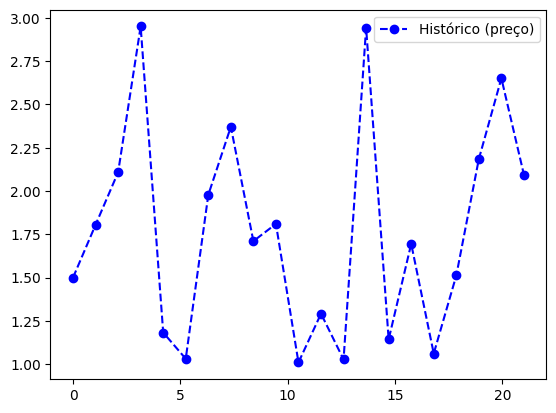

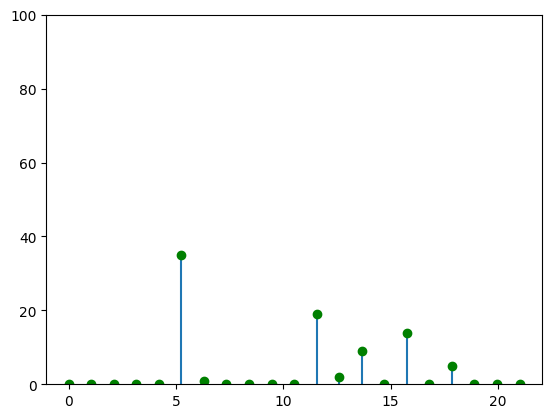

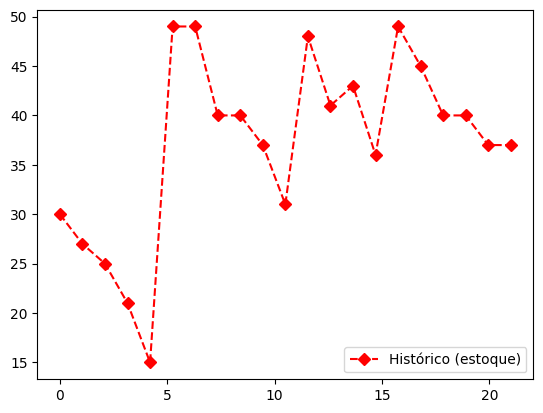

In [ ]:
# Criar o ambiente e o agente
ambiente = Ambiente()
agente = Agente(ambiente)

# Executar o agente por 20 dias
agente.executa_agente(20)

# Imprimir resultados
Imprime.imprime_resultado(agente)